<a href="https://colab.research.google.com/github/kaho0/Aaagh-more-math/blob/main/Module_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
)

plt.rcParams["figure.figsize"] = (7, 5)

#  Module 11.3 – Building a Simple Decision Tree (Synthetic Data)

This module introduces decision trees using a very small, easy-to-understand dataset.  
The goal is **intuition**, not accuracy.

---

##  Objectives

- Create a **tiny synthetic dataset**  
- Train a **Decision Tree Classifier**  
- Visualize the **learned tree**  
- Understand **how the tree makes decisions**

---

# 🔹 11.3.1 Create a Small Synthetic Dataset

For this example, we use a toy dataset with just two input features:

### **Features**
- **Weather**: `"Sunny"` or `"Rainy"`
- **Windy**: `0` = No, `1` = Yes  

### **Target**
- **Play**:  
  - `1` = Play  
  - `0` = Do not play  

We will manually create this dataset using a pandas DataFrame.

---

##  Code: Create the Dataset

```python
import pandas as pd

# Tiny synthetic dataset
data = {
    "Weather": ["Sunny", "Sunny", "Rainy", "Rainy", "Sunny", "Rainy"],
    "Windy":   [0,       1,       0,       1,       0,       1],
    "Play":    [1,       0,       1,       0,       1,       0]
}

df = pd.DataFrame(data)
df


# 🔹 11.3.2 Encode Categorical Feature and Prepare X, y

Machine learning models in sklearn expect numeric inputs.  
We will encode the categorical feature:

- **Sunny → 1**  
- **Rainy → 0**  

The feature **Windy** is already numeric (0/1), so we use it directly.  
The target variable **Play** is already 0/1.

---
#

In [3]:
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic


,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


# 🔹 11.3.3 Train a Simple Decision Tree

Now we train a Decision Tree Classifier.

We set `max_depth=3` just to keep the tree small and easily interpretable.
For this introductory example, we fit the model on all available data, as the primary goal is to build intuition rather than perform rigorous evaluation.

In [4]:
df_synthetic['Weather_num']=df_synthetic['Weather'].map({'Sunny':1,'Rainy':0})
x_syn=df_synthetic[['Weather_num','Windy']]
y_syn=df_synthetic['Play']
display(x_syn)
display(y_syn)

,Weather_num,Windy
0,1,0
1,0,1
2,1,0
3,1,1
4,0,0
5,0,1
6,1,0
7,0,1


,Play
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,0


In [6]:
tree_syn=DecisionTreeClassifier(max_depth=3,random_state=42)
tree_syn.fit(x_syn,y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

# 🔹 11.3.4 Visualize the Tree

Now we plot the tree. This helps students see:

- The root split
- Branches
- Leaf predictions
- How many samples go to each node

Note: `class_names=['No', 'Yes']` aligns with Play: `0` = No, `1` = Yes.

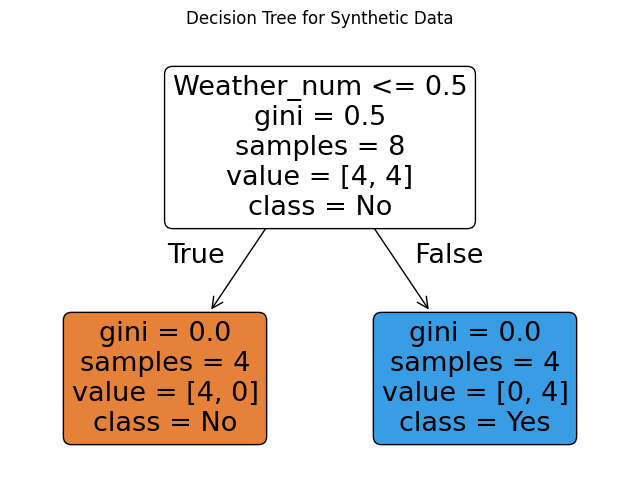

In [11]:
plt.figure(figsize=(8,6))
plot_tree(tree_syn,
          feature_names=['Weather_num','Windy'],
          class_names=['No','Yes'],
          filled=True,
          rounded=True,

          )
plt.title('Decision Tree for Synthetic Data')
plt.show()

In [13]:
exmple_1=pd.DataFrame([[1,0]],columns=['Weather_num','Windy'])
pred_1=tree_syn.predict(exmple_1)
pred_1

array([1])

# Module 11.4 – Overfitting and Pruning
In this section, we will:

- See how a deep tree can overfit
- Compare it with a pruned tree using `max_depth`
- Compare training vs test performance

We will use a slightly larger synthetic dataset so that overfitting becomes visible.

# 🔹 11.4.1 Create a slightly larger synthetic dataset
We create a synthetic binary classification dataset using `sklearn.datasets.make_classification`. This is not a real medical dataset, but it is enough to show overfitting clearly.

In [ ]:
from sklearn.datasets import make_classification